# EDA, Feature Engineering and LOGISTIC Regression(Classification Model)

## (Algerian Forest Fires Dataset)


*GitHub* : https://github.com/raviteja-padala/Machine-Learning-Algorithms

*Dataset*:  https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

*About the Data set*: The data set comprises of the study on Forest fires that occured in two regions of Algeria, namely the 'Bejaia region' and the 'Sidi Bel-abbes region' during the period of june to september in year 2012. In this dataset we have data observations of 'Meteorological conditions' and 'Fire Weather Index(FWI) components' that influence the forest fires. 


**Problem Statement**
To build a model to predict whether fire or no fire condition in the forest, based on certain diagnostic measurements included in the dataset using Logistic Regression model.


*Logistic Regression:* Logistic regression (or logit regression) is a supervised classification algorithm that is used to estimate the probability that an occurrence belongs to a classification.It calculates the probability that a given value belongs to a specific class.


1. Exploratory Data Analysis and Feature Engineering

* Data Description
* Data Exploration
* Stastical analysis
* Graphical Analysis
* Data Encoding
* Data Scaling
* Checking balance in dataset

2. Logistic Regression Model

* Logistic Regression
* Performance metrics for above models

3. Task
* Checking balance in dataset
* Creating an imbalanced dataset from original dataset
* Balancing the imbalanced Dataset
* Logistic Regression on above dataset
* Performance Metrics for above Dataset
* Compairing the performance of Original balanced dataset and the balanced dataset that we create from an imbalanced one.

In [1]:
#importing libraries
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### To save the model
import pickle

In [2]:
#Reading forest fire csv Data set as alias ff

ff = pd.read_csv(r'file:///E:\Users\Raviteja\Downloads\Datasets\Algerian_forest_fires_dataset_UPDATE.csv', header=1)


In [3]:
# using head() function to show top 05 rows
ff.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
## Removing unnecessary rows from datasets

ff.drop([122,123], inplace = True) 
ff.reset_index(inplace=True)
ff.drop('index',axis=1,inplace=True)

In [5]:
### creating feature called Region 0 for Bejaia region and 1 for Sidi Bel-abbes region
ff.loc[:122,'Region']=0
ff.loc[122:, 'Region']=1

In [6]:
# To check shape of data set i.e., No. of rows and No. of columns in Data set.

ff.shape

(244, 15)

In [7]:
# TO check basic info of data set

ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [8]:
# columns names from data set
ff.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [9]:
# here it is visible that some columns have spaces in the names like RH, Ws
# stripping spaces from column names
ff.columns = [fea.strip() for fea in ff.columns]
ff.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
### converting all feature values to string so that we can do data cleaning as shown below.
ff=ff.astype(str)

### somes values in colums also have space
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    ff[feature]= ff[feature].str.replace(" ","")

In [11]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [12]:
### index no 165 for feature name FWI has value fire
ff[ff['FWI']== 'fire'].index

Int64Index([165], dtype='int64')

In [13]:
### replacing fire value with a float value
ff.loc[165,'FWI']=' 0.1'


In [14]:
#checking column classes

ff['Classes'].value_counts()

fire       137
notfire    106
nan          1
Name: Classes, dtype: int64

In [15]:
### we have 1 nan value,  replacing nan value with fire to make data equal to the info given in dataset 
ff[ff['Classes']== 'nan'].index
ff.loc[165,'Classes']='fire'

ff['Classes'].value_counts()

fire       138
notfire    106
Name: Classes, dtype: int64

In [16]:
### changing datatypes of features to numerical for numerical features as all are in object

datatype_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
                  'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64', 'Region':'float64'}

dataset = ff.astype(datatype_convert)
dataset.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region         float64
dtype: object

In [17]:
### checking for null values

dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [18]:
dataset.shape

(244, 15)

In [19]:
#checking column classes

dataset['Classes'].value_counts()

fire       138
notfire    106
Name: Classes, dtype: int64

#### Checking for balanced data

Balanced data refers to those types of datasets where the target class has an even distribution of observations.

<AxesSubplot:xlabel='Classes', ylabel='count'>

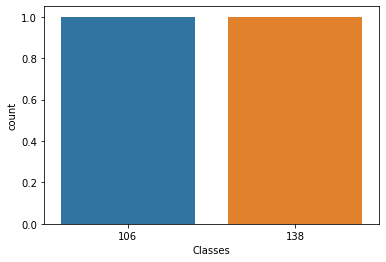

In [20]:
sns.countplot(dataset['Classes'].value_counts())

#### Observation:

Our dataset is balanced dataset

In [21]:
### Getting uniques values in each features

dataset.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

In [22]:
#dataset describe

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4


Info about dataset:

* The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the "Bejaia region" and the "Sidi Bel-abbes region" 122 instances for each region.

* The period from June 2012 to September 2012. Excluding the date,month,year, The dataset includes 11 attribues and 1 output attribue (classes).

* The 244 instances have been classified into fire (138 classes) and notfire (106 classes) classes.



* Meterological components observations:

Temp : temperature in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8

* FWI Components observations:

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

<AxesSubplot:xlabel='Classes', ylabel='count'>

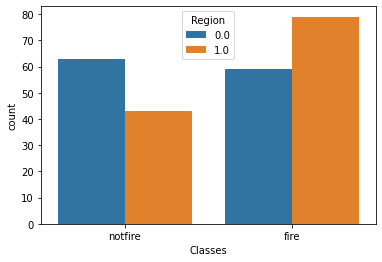

In [23]:
# FInding fire and not fire scenarios based on region
sns.countplot(data=dataset, x='Classes', hue='Region')

### Observation: 

It is evident that Sidi Bel-abbes region has more occurance of fire than Bejaia region.

In [24]:
#Extracting features that can impact our dependent variable that is temparature

ff_indep = dataset[['Temperature','RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']]
ff_indep.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


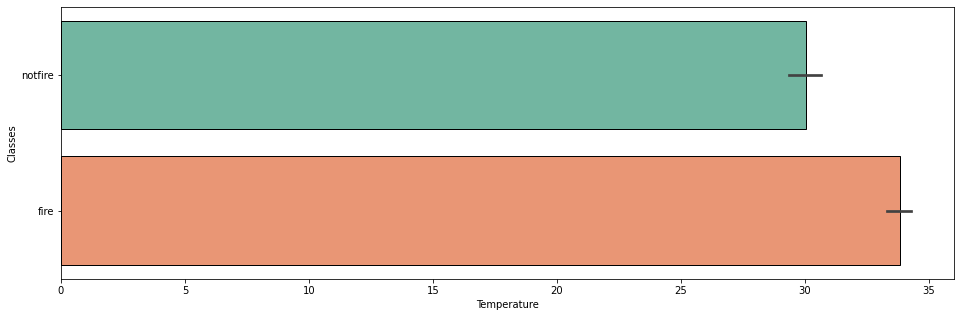

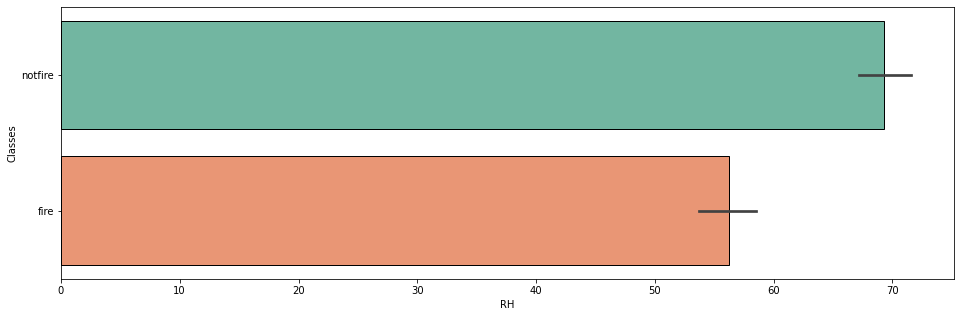

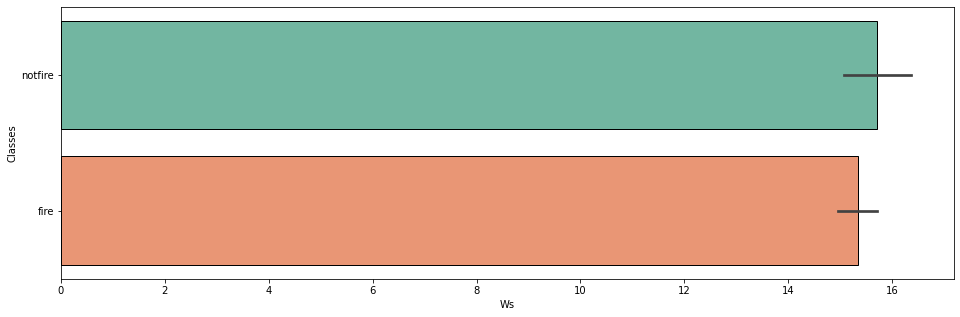

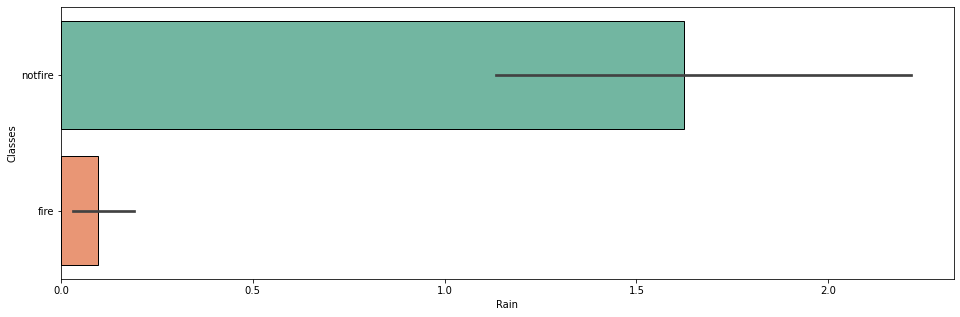

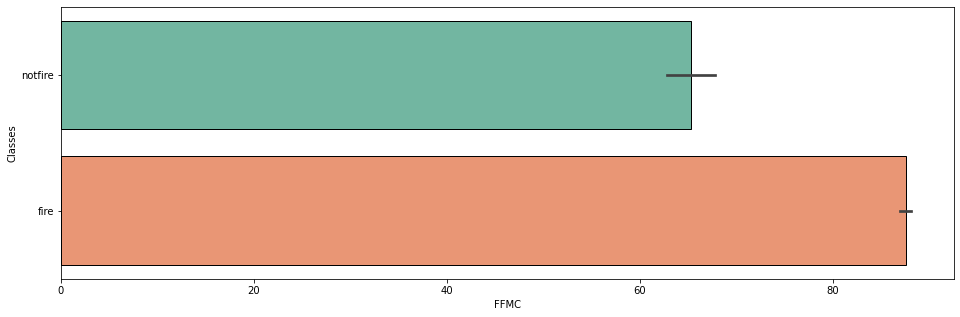

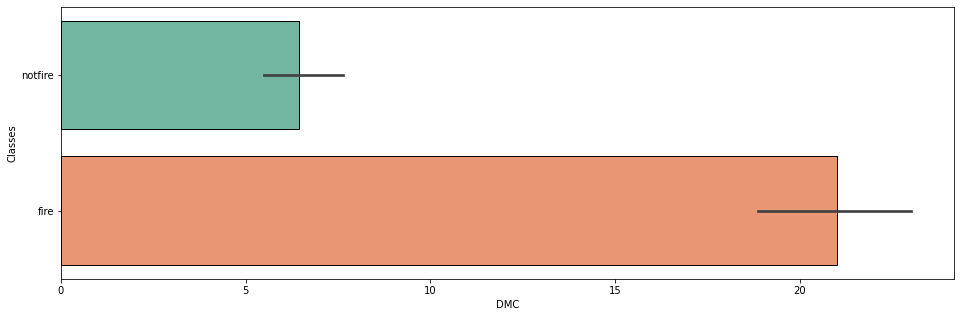

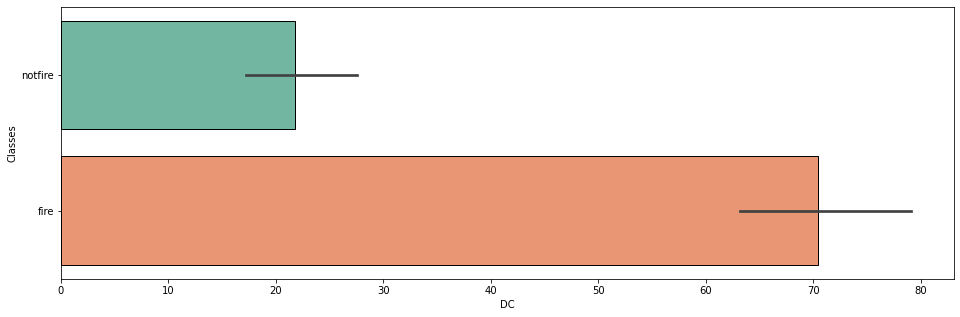

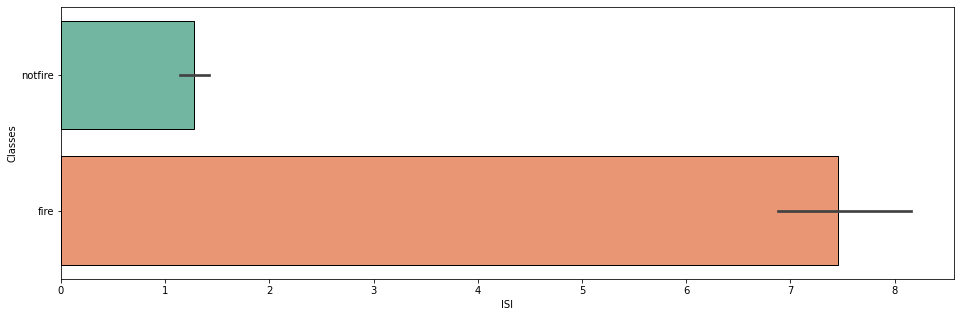

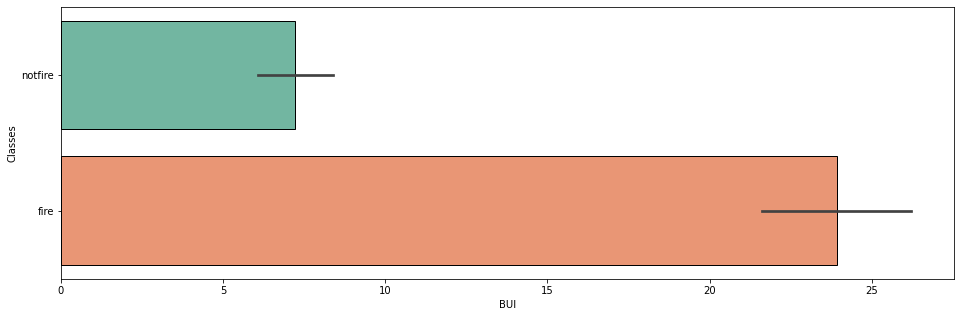

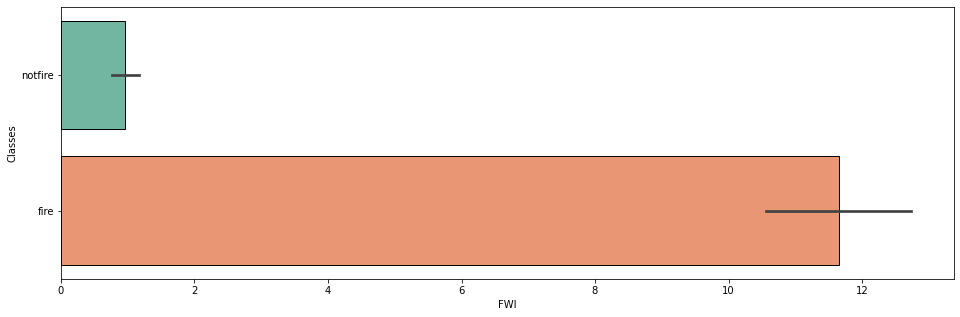

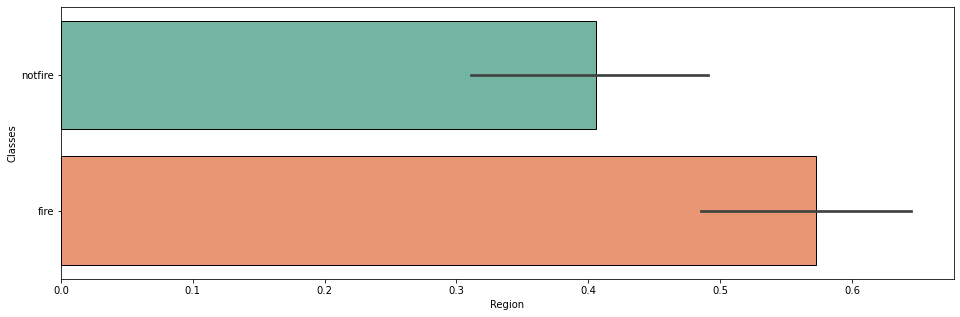

In [25]:
# relation between features and fire and no fire condition.

for i in ff_indep:
    plt.subplots(figsize=(16,5))
    sns.barplot(x=ff_indep[i], y=ff.Classes,ec = "black",palette="Set2")
    plt.show()

### Observation:

* Higher RH, Rain, Windspeed contributed for higher No fire scenarios.
* Remaining all other features are directly correlated to fire condition.


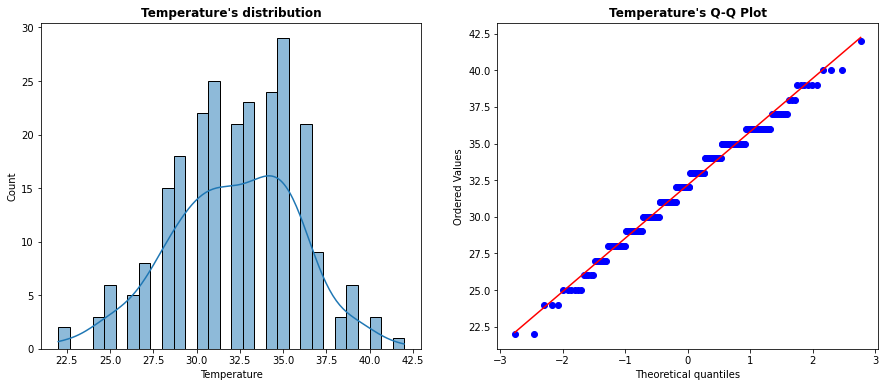

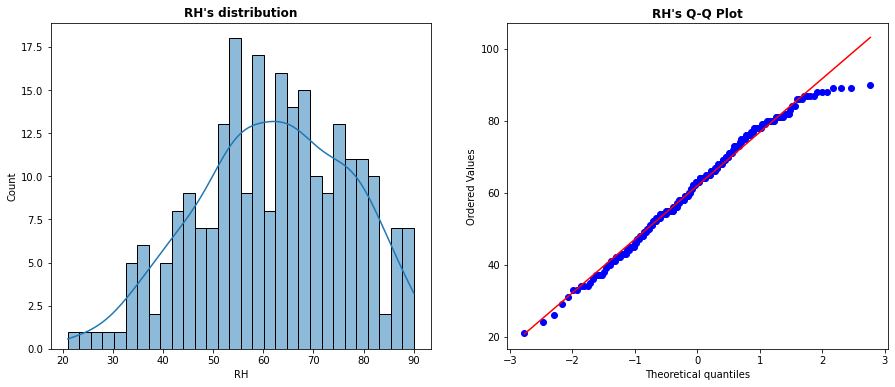

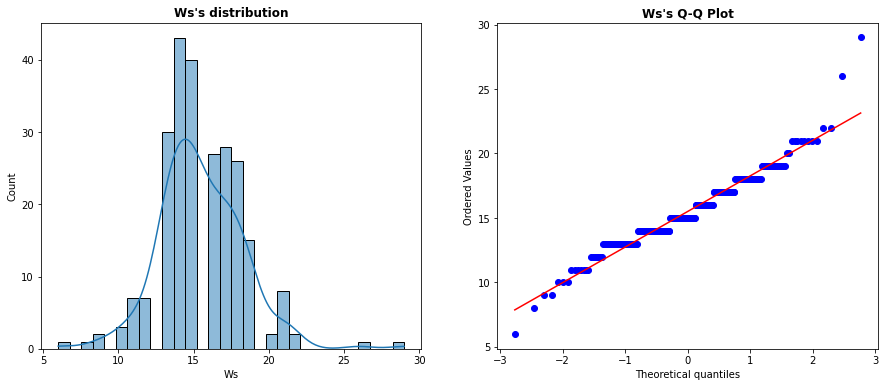

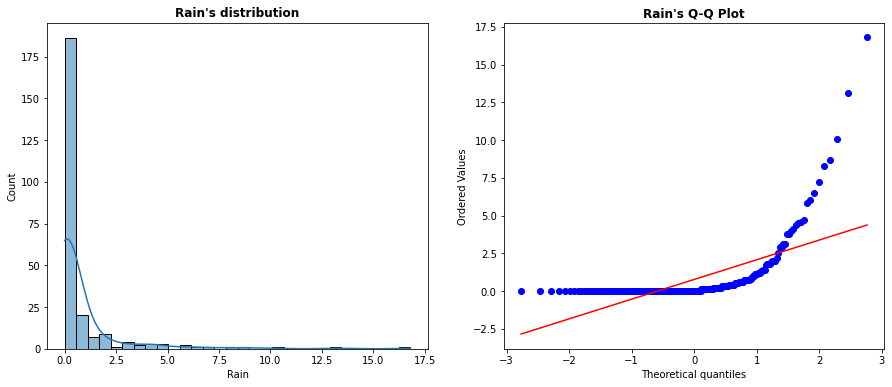

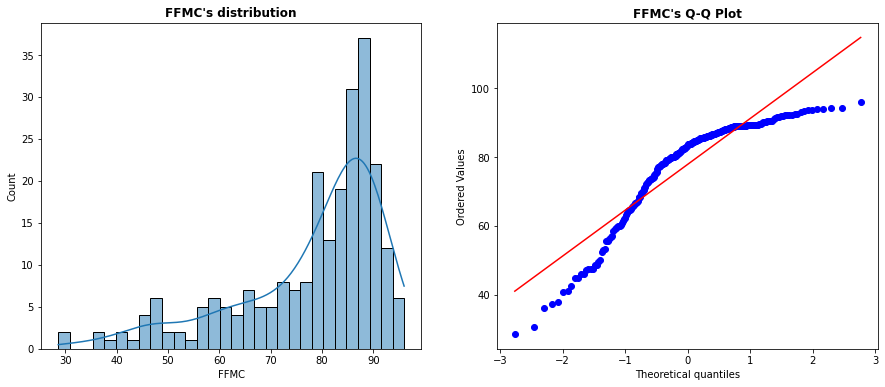

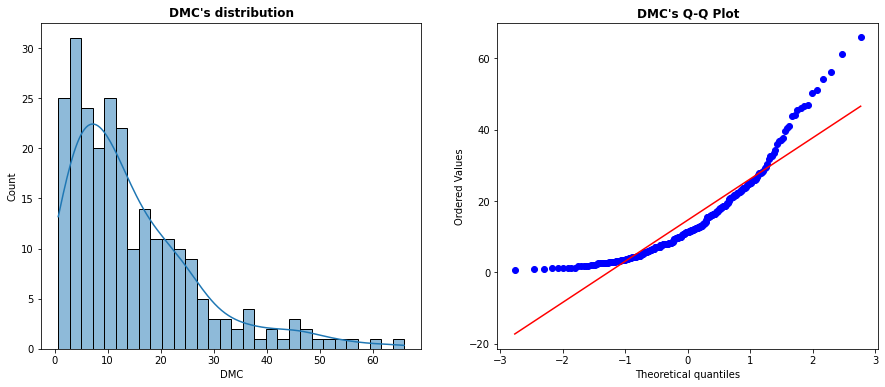

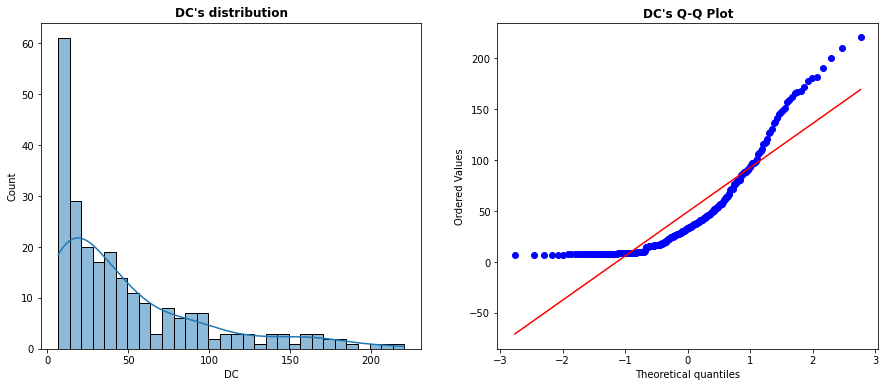

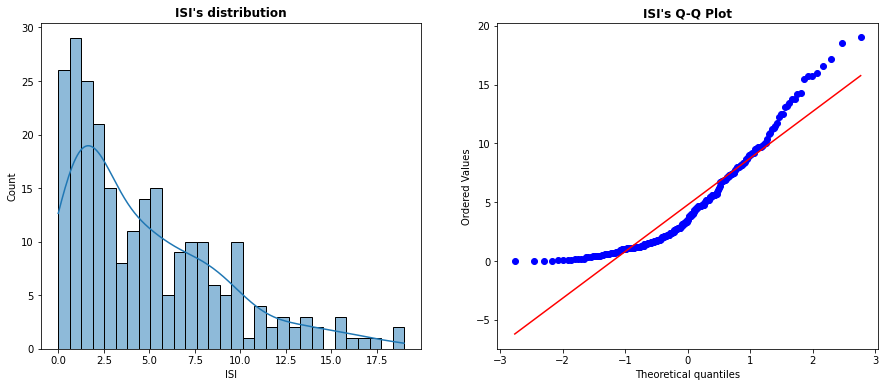

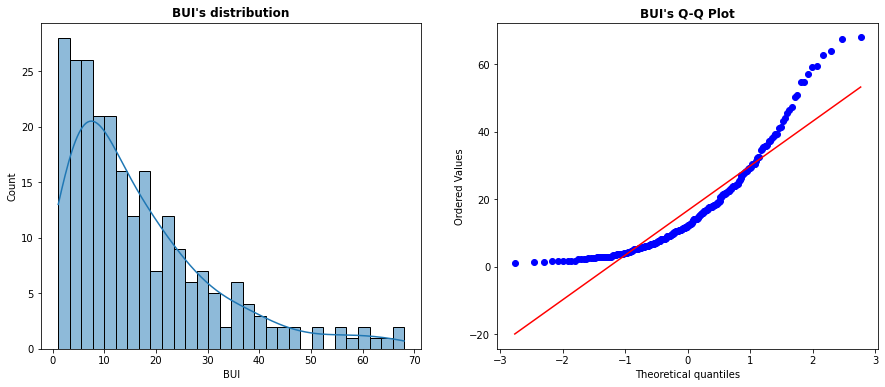

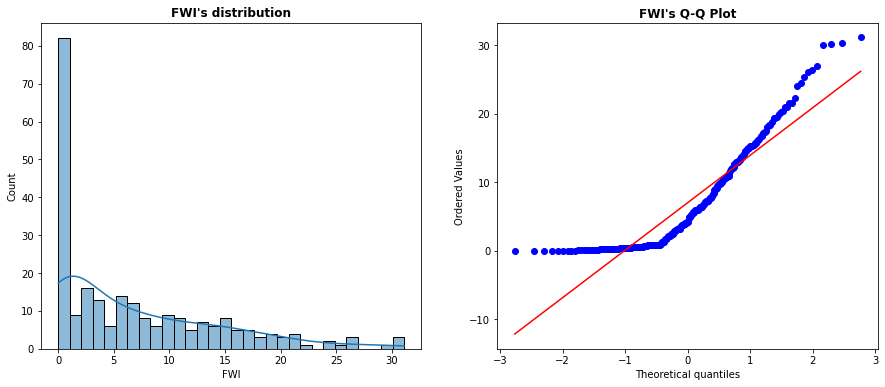

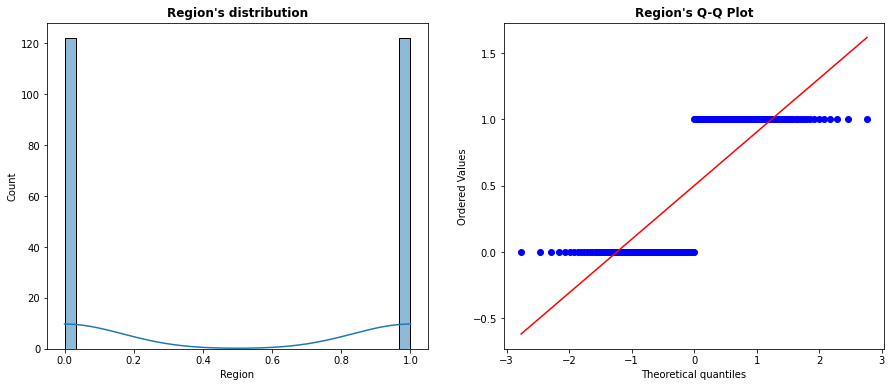

In [26]:
### Checking distribution of Continuous numerical features

for i in ff_indep:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=dataset, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
    plt.subplot(122)
    stats.probplot(dataset[i], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")

### Observation:

* Relative humidity is following gaussian distribution.
* Rain, DMC, DC, ISI, BUI, FWI are following right skewed distribution(Log-Normal distribution).
* FFMC feature follows left skwed distribution.

<AxesSubplot:>

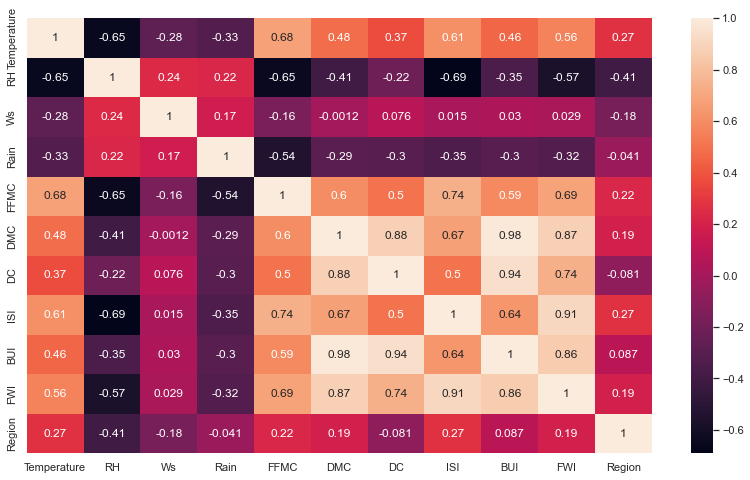

In [27]:
#finding the correlation between the variables in the dataset in the form of a heatmap

sns.set(rc={'figure.figsize':(14,8)})
sns.heatmap(ff_indep.corr(),  annot = True)

### Observations
* Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI

* Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI

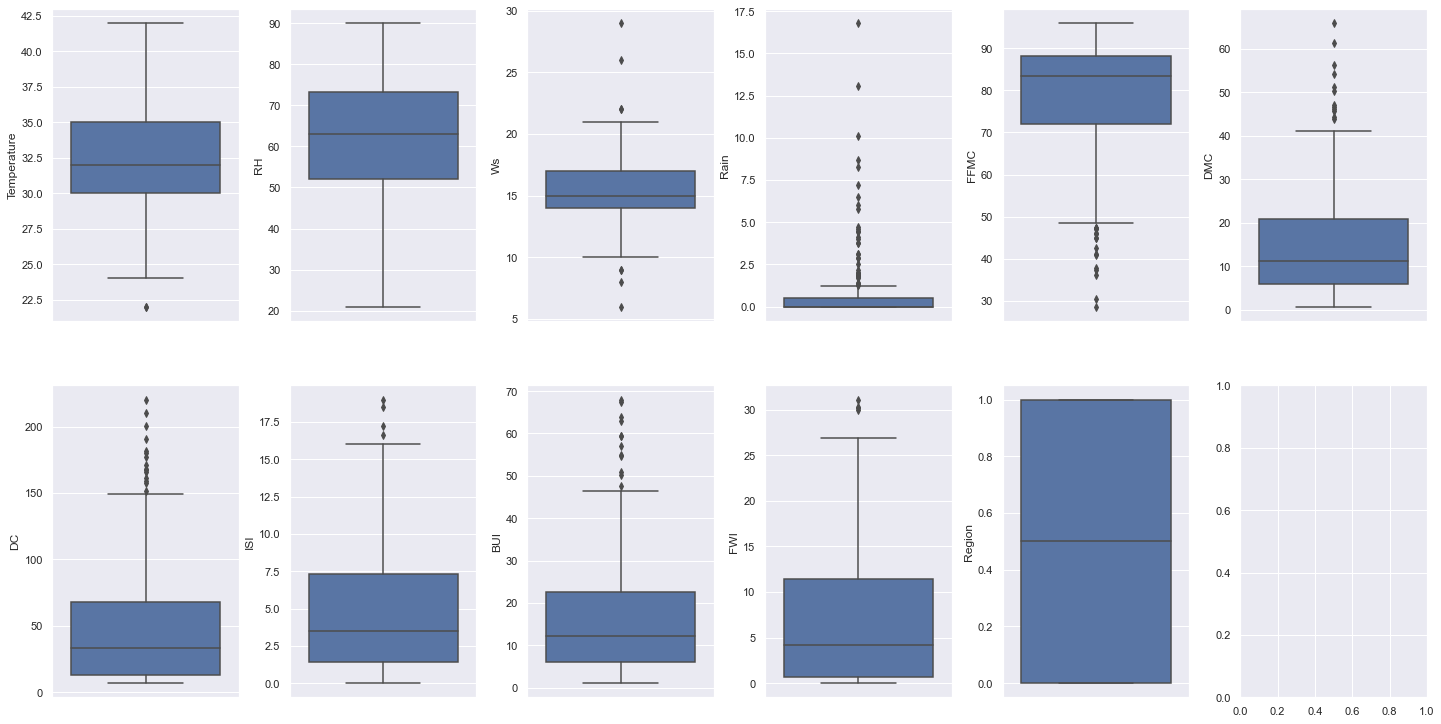

In [28]:
# Finding Outliers

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in ff_indep.items():
    sns.boxplot(y=k, data= dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

plt.show()


### Observation:

Ws, Rain, FFMC, DMC BUI has many outliers

In [29]:
### encoding classes feature
dataset['Classes']=dataset['Classes'].str.replace('notfire','0')
dataset['Classes']=dataset['Classes'].str.replace('fire','1')

dataset['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

In [30]:
## somes values in colums also have space

dataset['Classes']= dataset['Classes'].str.replace(" ","")

In [31]:
dataset['Classes'].dtypes

dtype('O')

In [32]:
dataset['Classes']=dataset['Classes'].astype(float)
dataset['Classes'].dtypes

dtype('float64')

In [33]:
data=dataset.copy()
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0.0


In [34]:
#Dropping the outliers
def outliers_imputation_mild(data,column):
    IQR=data[column].quantile(0.75)-data[column].quantile(0.25)
    lower_fence=data[column].quantile(0.25)-(IQR*1.5)
    upper_fence=data[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    data.loc[data[column]<=lower_fence,column]=lower_fence
    data.loc[data[column]>=upper_fence,column]=upper_fence 

In [35]:
columns=data.columns

In [36]:
for col in columns:
    outliers_imputation_mild(data,col)

IQR: 15.0
Lower Fence day: -14.5
Upper Fence day: 45.5
____________________________________________
IQR: 1.0
Lower Fence month: 5.5
Upper Fence month: 9.5
____________________________________________
IQR: 0.0
Lower Fence year: 2012.0
Upper Fence year: 2012.0
____________________________________________
IQR: 5.0
Lower Fence Temperature: 22.5
Upper Fence Temperature: 42.5
____________________________________________
IQR: 21.25
Lower Fence RH: 20.125
Upper Fence RH: 105.125
____________________________________________
IQR: 3.0
Lower Fence Ws: 9.5
Upper Fence Ws: 21.5
____________________________________________
IQR: 0.5
Lower Fence Rain: -0.75
Upper Fence Rain: 1.25
____________________________________________
IQR: 16.224999999999994
Lower Fence FFMC: 47.73750000000001
Upper Fence FFMC: 112.63749999999999
____________________________________________
IQR: 14.95
Lower Fence DMC: -16.624999999999996
Upper Fence DMC: 43.175
____________________________________________
IQR: 54.87500000000001
L

In [37]:
data_indep = data[['Temperature','RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']]


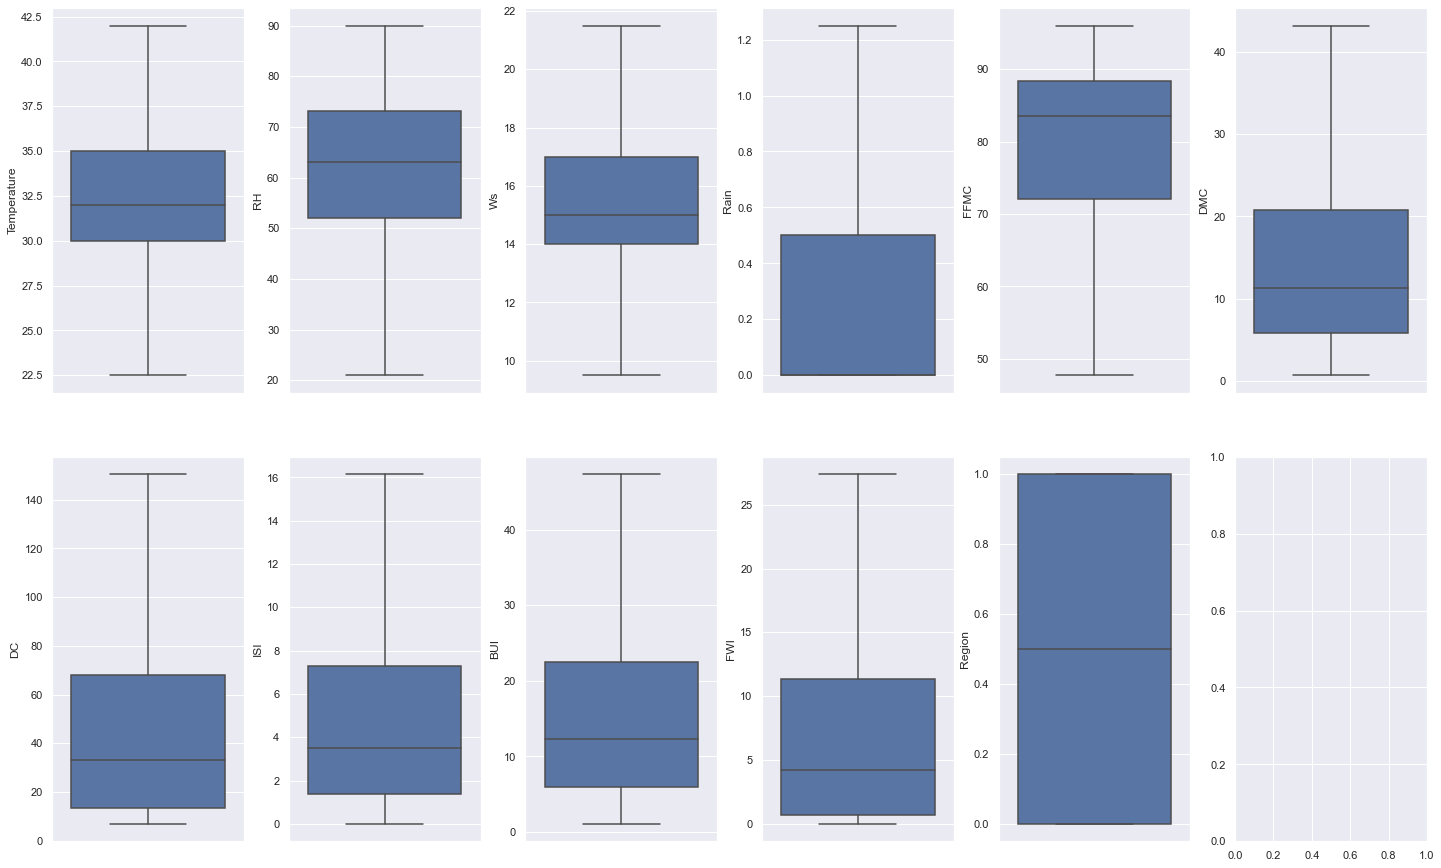

In [38]:
#Rechecking the outliers after dropping it

fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 12))
index = 0
axs = axs.flatten()
for k,v in data_indep.items():
    sns.boxplot(y=k, data= data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

plt.show()


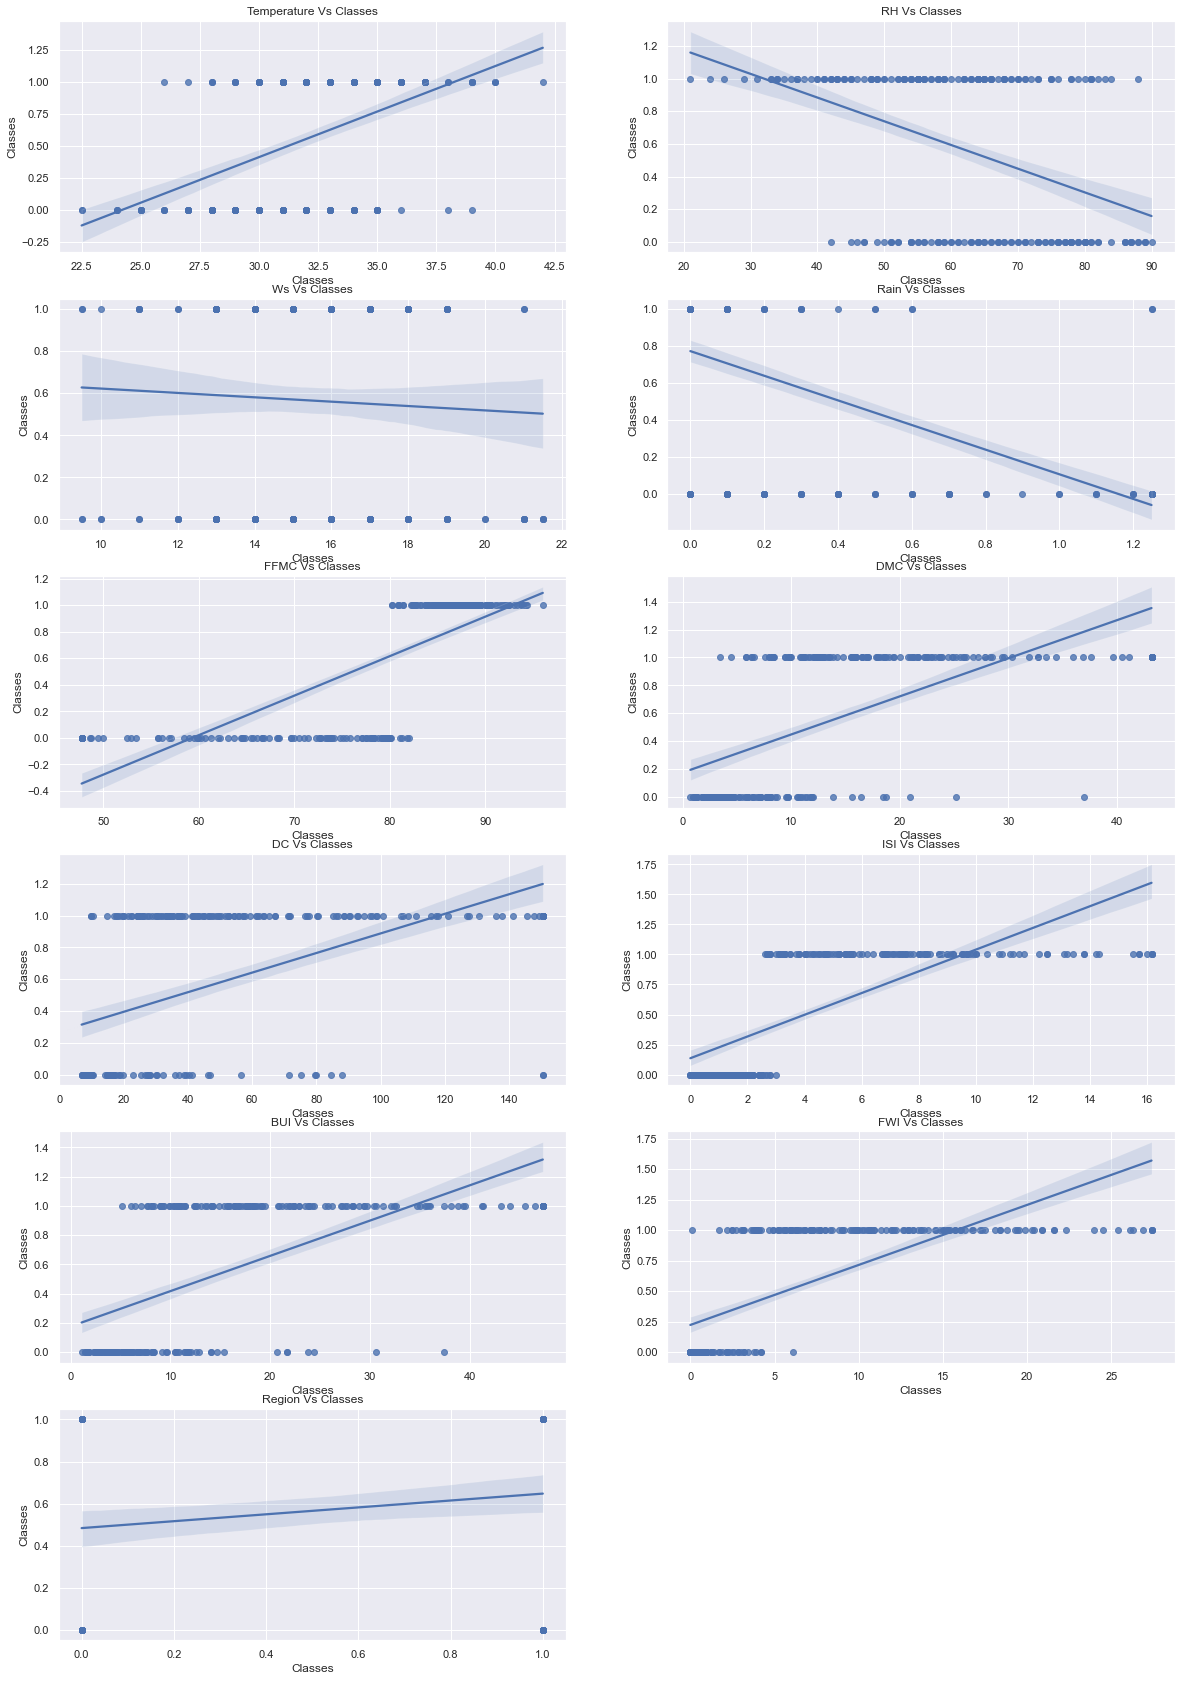

In [39]:
plt.figure(figsize=(20,40))
for i in enumerate(ff_indep):
    plt.subplot(8,2,i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(data=data,x=i[1],y='Classes')
    plt.xlabel('Classes')
    plt.title('{} Vs Classes'.format(i[1]))

## Model Building
### Getting independent features in dataset(X) and dependent feature in series(y)

In [40]:
#Creating Independent and Dependent Features

X = data.drop(columns = ['Classes'])
y = data['Classes']

In [41]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1.0,6.0,2012,29.0,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,2012,29.0,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,2012,26.0,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,2012,25.0,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,2012,27.0,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0.0


In [42]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Classes, dtype: float64

In [43]:
### random state train test split will be same with all people using random_state=16

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

X_train.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
216,3.0,9.0,2012,28.0,75.0,16.0,0.0,82.2,4.4,24.3,3.3,6.0,2.5,1.0
199,17.0,8.0,2012,42.0,24.0,9.5,0.0,96.0,30.3,76.4,15.7,30.4,24.0,1.0
156,5.0,7.0,2012,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
175,24.0,7.0,2012,33.0,63.0,17.0,1.1,72.8,20.9,56.6,1.6,21.7,2.5,1.0
228,15.0,9.0,2012,32.0,51.0,13.0,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1.0


In [44]:
y_train.head()

216    1.0
199    1.0
156    1.0
175    0.0
228    1.0
Name: Classes, dtype: float64

In [45]:
### both will have same shape
X_train.shape, y_train.shape

((170, 14), (170,))

In [46]:
### both will have same shape
X_test.shape, y_test.shape

((74, 14), (74,))

### Standardisation/ Feature scaling the dataset

In [47]:
### Creating a standard scaler object
scaler=StandardScaler()
scaler

StandardScaler()

In [48]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[-1.46667507,  1.32918909,  0.        , ..., -0.78980167,
        -0.6264358 ,  0.95399809],
       [ 0.12870275,  0.44306303,  0.        , ...,  1.1152245 ,
         2.31137922,  0.95399809],
       [-1.23876395, -0.44306303,  0.        , ...,  0.20174884,
         1.08159619,  0.95399809],
       ...,
       [ 1.610125  ,  1.32918909,  0.        , ..., -1.0708711 ,
        -0.95437794, -1.04822013],
       [ 1.04034721,  1.32918909,  0.        , ..., -0.15739544,
        -0.55811452,  0.95399809],
       [ 0.24265831, -0.44306303,  0.        , ...,  0.60773802,
         0.27540509,  0.95399809]])

In [49]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)
X_test

array([[-0.44107504,  0.44306303,  0.        , ...,  0.35789852,
        -0.39414345, -1.04822013],
       [ 1.38221389, -1.32918909,  0.        , ...,  0.85757752,
         1.54618089,  0.95399809],
       [ 1.610125  , -1.32918909,  0.        , ...,  0.95126733,
         0.79464681, -1.04822013],
       ...,
       [-0.21316393,  1.32918909,  0.        , ..., -1.13333097,
        -0.95437794, -1.04822013],
       [ 0.12870275,  0.44306303,  0.        , ...,  0.52966318,
         1.02693916, -1.04822013],
       [ 1.38221389, -0.44306303,  0.        , ..., -0.03247569,
         0.26174083,  0.95399809]])

### Logistic Regression


In [50]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression()
logistic_reg

LogisticRegression()

In [51]:

### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression()

### Using Above Model to get prediction for test data


In [52]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1.])

### Performance Metrics
#### Confusion Matrix

Confusion Matrix is the visual representation of the Actual VS Predicted values. It measures the performance of our Machine Learning classification model.

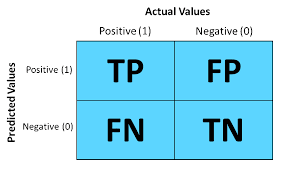

In [53]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[34,  2],
       [ 1, 37]], dtype=int64)

In [54]:
truly_positive=confusion_mat[0][0]
falsely_positive=confusion_mat[0][1]
falsely_negative=confusion_mat[1][0]
truly_negative=confusion_mat[1][1]

Text(0.5, 257.44, 'Predicted Label')

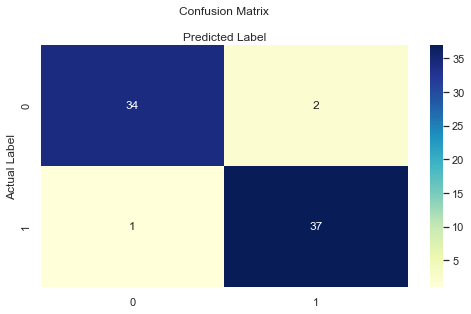

In [55]:
#plotting confusion matrix
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7, 4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(confusion_mat), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

#### Accuracy Score

Accuracy: Percentage of correct predictions. It is calculated by dividing the total number of correct predictions by all the predictions.

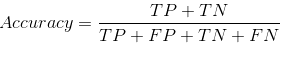

In [56]:

### accuracy using accuracy_score
accuracy=round(accuracy_score(y_test, logistic_reg_pred),4)
accuracy

0.9595

In [57]:
### manual calcualtion for accuracy
accuracy_manual=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual))

Accuracy of our model is 0.9595


#### Precision Score

Correct positive predictions relative to total positive predictions.

Precision checks how many outcomes are actually positive outcomes out of the total positively predicted outcomes

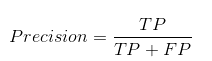

In [58]:
precision_manual=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision_manual))

Precision of our model is 0.9444


#### Recall Score

Correct positive predictions relative to total actual positives.

Sensitivity (sometimes called Recall) measures how good the model is at predicting positives.

The recall is the measure to check correctly positive predicted outcomes out of the total number of positive outcomes.

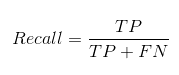

In [59]:
recall_manual=round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(recall_manual))

Recall of our model is 0.9714


#### F-1 Score

F-score is the "harmonic mean" of precision and sensitivity.

It considers both false positive and false negative cases and is good for imbalanced datasets.

The beta value < 1 gives more weight to Precision than Recall and the beta value>1 gives more weight to Recall.

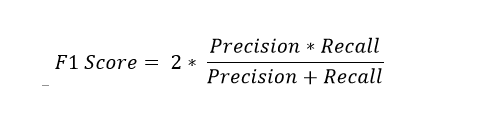

In [60]:

f1_score=2*(precision_manual*recall_manual)/(precision_manual+recall_manual)
print("F-1 Score of our model is {} ".format(round(f1_score,4)))

F-1 Score of our model is 0.9577 


### Classification Report

In [61]:
print(classification_report(y_test, logistic_reg_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96        36
         1.0       0.95      0.97      0.96        38

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



### ROC curve

The Receiver Operating Characteristic (ROC) curve is a two-dimensional curve with the True Positive Rate on the vertical axis and False Positive Rate on the horizontal axis.The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems.

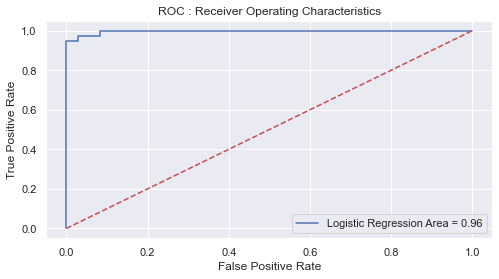

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_score = roc_auc_score(y_test,logistic_reg.predict(X_test))
fpr, tpr, thr = roc_curve(y_test, logistic_reg.predict_proba(X_test)[:,1])
plt.figure(figsize= (8,4))
plt.plot(fpr,tpr, label='Logistic Regression Area = {:.2f}'.format(roc_score))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC : Receiver Operating Characteristics')
plt.legend()
plt.show()

### AUC

Area Under Curve or AUC is one of the most widely used metrics for model evaluation. It is generally used for binary classification problems. AUC measures the entire two-dimensional area present underneath the entire ROC curve. AUC measures how well a model is able to distinguish between classes.Area Under Curve (AUC) is the proportion of area below the ROC Curve.

In [63]:
from sklearn.metrics import  auc

roc_auc = round(auc(fpr, tpr))

print("AUC of the model is:", roc_auc)

AUC of the model is: 1



The value of AUC ranges from 0 to 1. An excellent model poses an AUC near to the 1 which tells that it has a good measure of separability.

#### Saving the Model


In [64]:
### Writing model to a file that will be used while deployment
with open('model_Logistic_regression_algerian_ff.sav','wb') as f:
    pickle.dump(logistic_reg,f)

#### Checking for balanced data

Balanced data refers to those types of datasets where the target class has an even distribution of observations.

<AxesSubplot:xlabel='Classes', ylabel='count'>

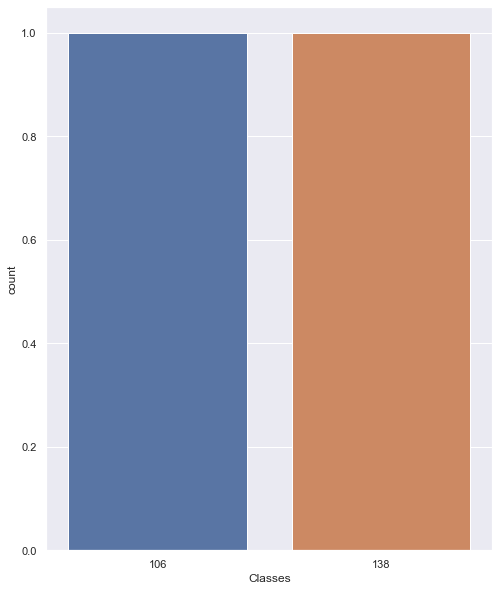

In [65]:
sns.countplot(data['Classes'].value_counts())

#### Observation:

Our dataset is balanced dataset

## What is imbalanced data?

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

In [66]:
# Creating Imbalance in dataset
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012,29.0,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0.0,0.0
1,2.0,6.0,2012,29.0,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0.0,0.0
2,3.0,6.0,2012,26.0,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0.0,0.0
3,4.0,6.0,2012,25.0,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0.0,0.0
4,5.0,6.0,2012,27.0,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0.0,0.0


In [67]:
data.shape

(244, 15)

In [68]:
### Creating imbalance
### 1. splitting data in 90:10 percent ratio using train test split
X1 = pd.DataFrame(data, columns = ['day', 'month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region'])
y1=pd.DataFrame(data,columns = ['Classes'])

In [69]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X1, y1, test_size=0.10, random_state=17)

In [70]:
## Both will have same shape
X_train_imb.shape, y_train_imb.shape

((219, 13), (219, 1))

In [71]:
#Replacing all values as 1 in y_train and all values as zero in y_test to create imbalance
y_train_imb=y_train_imb.replace(0,1)
y_train_imb.head()

,Classes
156,1.0
183,1.0
11,1.0
75,1.0
130,1.0


In [72]:
y_test_imb=y_test_imb.replace(1,0)
y_test_imb.head()

,Classes
48,0.0
216,0.0
101,0.0
38,0.0
86,0.0


In [73]:
X_train_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
156,5.0,7.0,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
183,1.0,8.0,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0
11,12.0,6.0,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0
75,15.0,8.0,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0
130,9.0,6.0,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0


In [74]:
### Combining X_train_imb and y_train_imb
train_imb=X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
156,5.0,7.0,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1.0
183,1.0,8.0,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1.0
11,12.0,6.0,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1.0
75,15.0,8.0,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1.0
130,9.0,6.0,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1.0


In [75]:
### Combining X_test_imb and y_test_imb
test_imb=X_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
48,19.0,7.0,35.0,59.0,17.0,0.00,88.1,12.000,52.8000,7.7,18.2000,10.9,0.0,0.0
216,3.0,9.0,28.0,75.0,16.0,0.00,82.2,4.400,24.3000,3.3,6.0000,2.5,1.0,0.0
101,10.0,9.0,33.0,73.0,12.0,1.25,59.9,2.200,8.9000,0.7,2.7000,0.3,0.0,0.0
38,9.0,7.0,32.0,68.0,14.0,1.25,66.6,7.700,9.2000,1.1,7.4000,0.6,0.0,0.0
86,26.0,8.0,31.0,78.0,18.0,0.00,85.8,43.175,150.4625,4.7,47.3125,13.7,0.0,0.0


In [76]:
### Checking the shape of imbalanced Data
train_imb.shape, test_imb.shape

((219, 14), (25, 14))

In [77]:
### Combining train_imb dataset and test_imb dataset into data_imb dataset 
data_imb=pd.concat([train_imb, test_imb], ignore_index=True, sort=False)
data_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,5.0,7.0,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1.0
1,1.0,8.0,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1.0
2,12.0,6.0,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1.0
3,15.0,8.0,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1.0
4,9.0,6.0,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1.0


In [78]:
data_imb.shape

(244, 14)

In [79]:
# Checking the imbalancing

data_imb.Classes.value_counts()

1.0    219
0.0     25
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

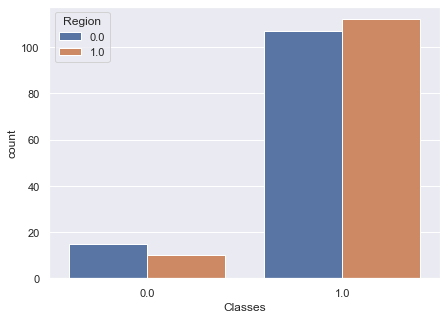

In [81]:
## 0 is 'Bejaia' and 1 is 'Sidi Bel-abbes region'
plt.figure(figsize=(7,5))
sns.countplot(data=data_imb,x='Classes',hue='Region')

### Logistic Regression on imbalanced Dataset

In [82]:
data_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,5.0,7.0,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1.0
1,1.0,8.0,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1.0
2,12.0,6.0,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1.0
3,15.0,8.0,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1.0
4,9.0,6.0,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1.0


### Seperating Independent Features and Dependent Feature

In [83]:
X1 = data_imb.drop(columns = ['Classes'])
y1 = data_imb['Classes']

In [84]:
X1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,5.0,7.0,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
1,1.0,8.0,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0
2,12.0,6.0,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0
3,15.0,8.0,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0
4,9.0,6.0,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0


In [85]:
y1.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Classes, dtype: float64

### Handling Imbalance dataset by Doing Upsampling

When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique is called oversampling or UPsampling. 

Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data.

In [88]:
### for upsampling 
from imblearn.combine import SMOTETomek

smk=SMOTETomek()
smk

SMOTETomek()

In [89]:
X_bal,y_bal=smk.fit_resample(X1,y1)

In [90]:
X_bal.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,5.0,7.0,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
1,1.0,8.0,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0
2,12.0,6.0,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0
3,15.0,8.0,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0
4,9.0,6.0,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0


In [91]:
y_bal.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Classes, dtype: float64

In [92]:
X_bal.shape,y_bal.shape

((426, 13), (426,))

In [93]:
## Creating Balanced data from imbalanced data
data_bal=X_bal.join(pd.DataFrame(y_bal))
data_bal.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,5.0,7.0,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1.0
1,1.0,8.0,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1.0
2,12.0,6.0,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1.0
3,15.0,8.0,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1.0
4,9.0,6.0,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1.0


### EDA on balanced Dataset

In [94]:
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          426 non-null    float64
 1   month        426 non-null    float64
 2   Temperature  426 non-null    float64
 3   RH           426 non-null    float64
 4   Ws           426 non-null    float64
 5   Rain         426 non-null    float64
 6   FFMC         426 non-null    float64
 7   DMC          426 non-null    float64
 8   DC           426 non-null    float64
 9   ISI          426 non-null    float64
 10  BUI          426 non-null    float64
 11  FWI          426 non-null    float64
 12  Region       426 non-null    float64
 13  Classes      426 non-null    float64
dtypes: float64(14)
memory usage: 46.7 KB


### Statistical analysis on Balanced Dataset

In [95]:
data_bal.describe().T

,count,mean,std,min,25%,50%,75%,max
day,426.0,14.808273,8.638910,1.0000,7.032095,14.841872,22.163261,31.0000
month,426.0,7.622785,0.988385,6.0000,7.000000,7.941649,8.302386,9.0000
Temperature,426.0,32.360257,3.202003,22.5000,30.000000,32.756074,34.826135,42.0000
RH,426.0,62.653598,13.465042,21.0000,54.000000,64.142116,72.150238,90.0000
Ws,426.0,15.730498,2.458556,9.5000,14.000000,16.000000,17.508050,21.5000
Rain,426.0,0.271847,0.426106,0.0000,0.000000,0.000000,0.400000,1.2500
FFMC,426.0,79.218740,11.721776,47.7375,72.760613,83.766950,88.120212,96.0000
DMC,426.0,14.922166,11.618785,0.7000,5.720891,12.428231,20.990086,43.1750
DC,426.0,51.765302,43.867033,6.9000,15.506817,38.106782,80.055568,150.4625
ISI,426.0,4.811949,3.787670,0.0000,1.562123,3.863483,7.300010,16.1500


In [96]:
data_bal_col= [feature for feature in data_bal.columns]
data_bal_col

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region',
 'Classes']

### Compairing the feature for Original and Balanced Dataset

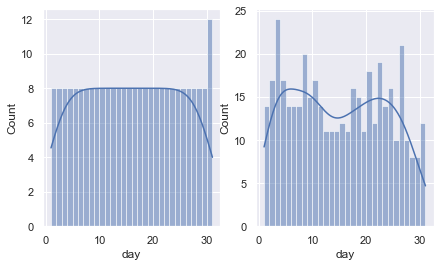

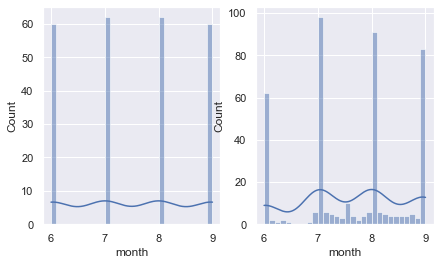

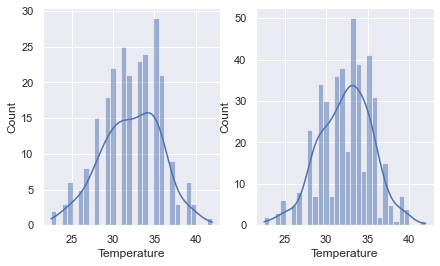

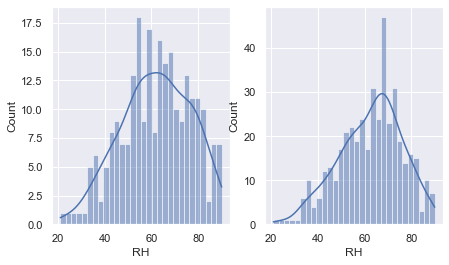

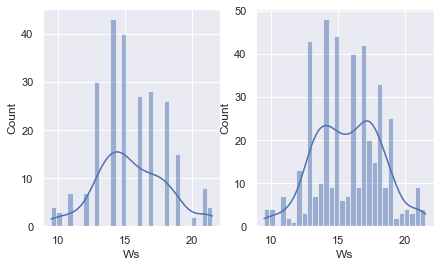

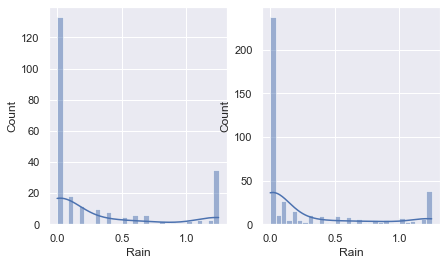

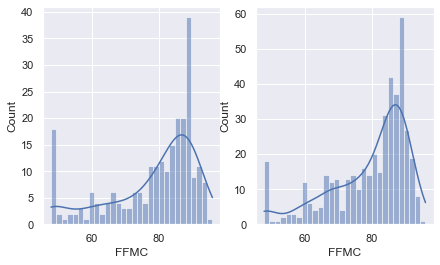

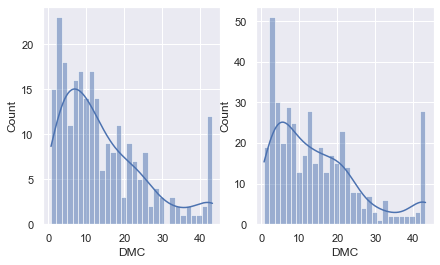

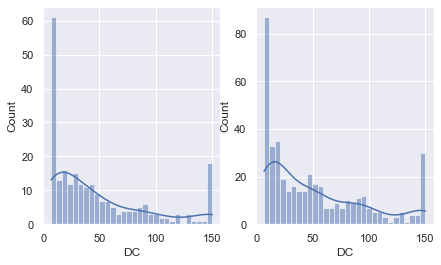

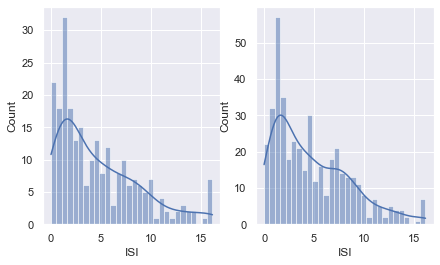

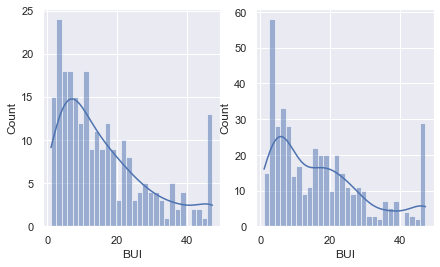

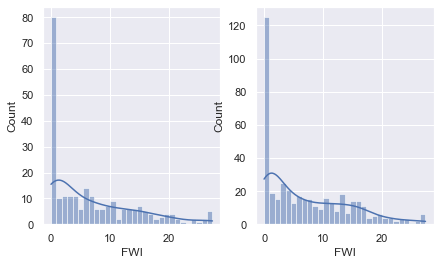

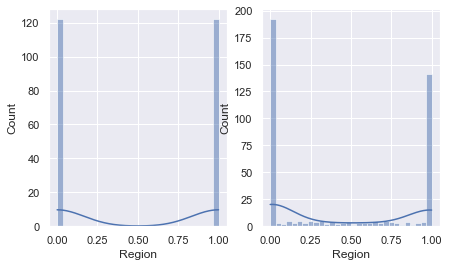

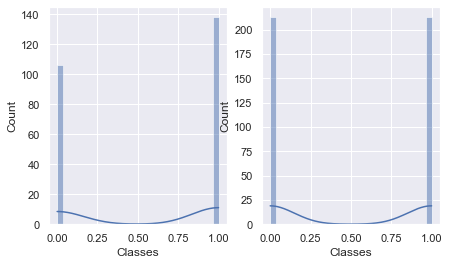

In [97]:
for i in data_bal_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.histplot(data=data,x=i,kde=True,bins=30)
    
    
    plt.subplot(122)
    sns.histplot(data=data_bal,x=i,kde=True,bins=30)
    

### Checking the Outliers for Original and Balanced Dataset

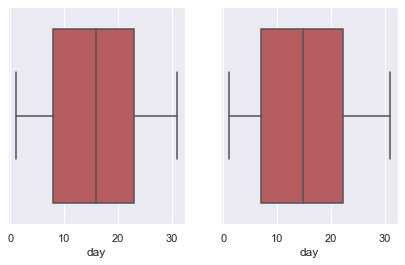

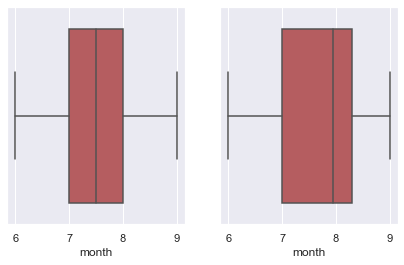

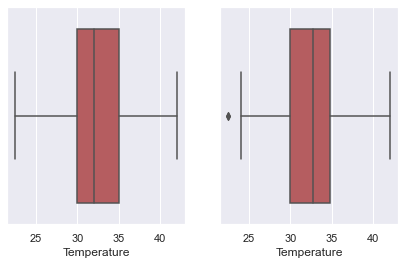

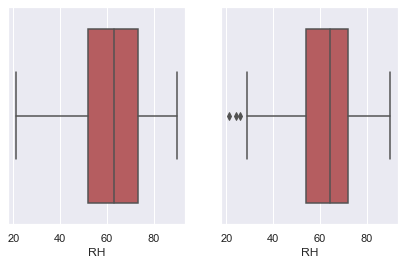

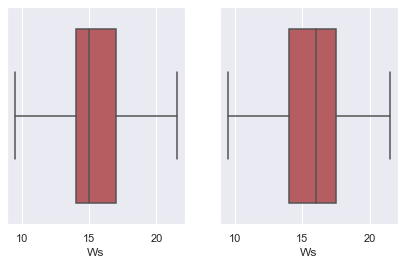

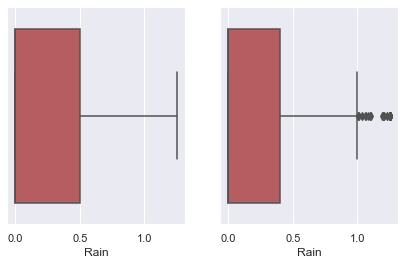

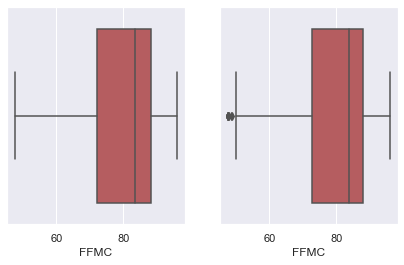

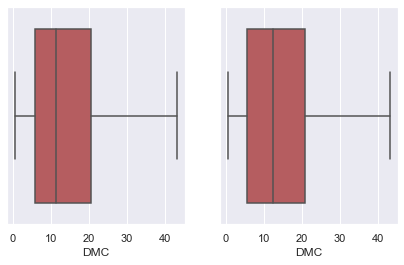

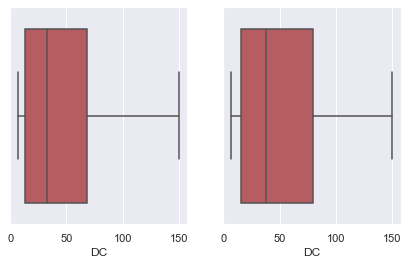

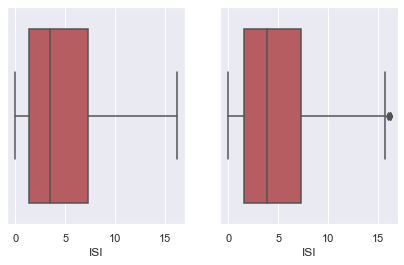

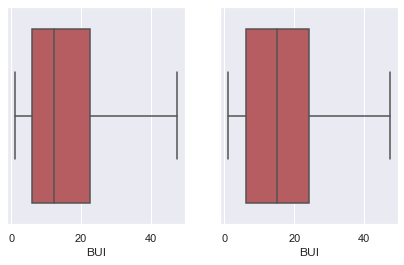

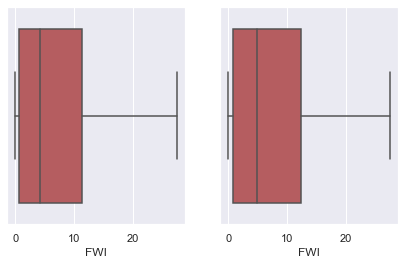

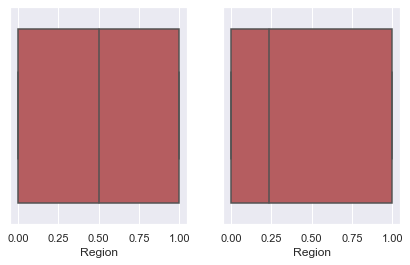

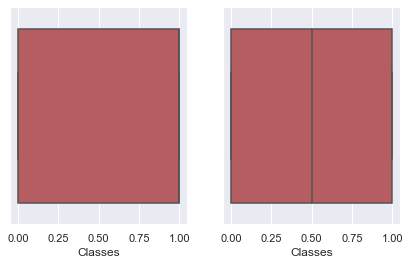

In [98]:
for i in data_bal_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.boxplot(data=data,x=i,color='r')
    
    
    plt.subplot(122)
    sns.boxplot(data=data_bal,x=i,color='r')

### Splitting data into Training and Test data

In [99]:
### random state train test split will be same with all people using random_state=16

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_bal, y_bal, test_size=0.30, random_state=16)

X_train1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
3,15.0,8.0,36.0,55.0,13.0,0.30,82.4,15.6,92.5,3.7,22.0,6.3,0.0
92,28.0,6.0,37.0,37.0,13.0,0.00,92.5,27.2,52.4,11.7,27.1,18.4,1.0
12,1.0,7.0,28.0,58.0,18.0,1.25,63.7,3.2,8.5,1.2,3.3,0.5,1.0
149,12.0,7.0,36.0,44.0,13.0,0.00,90.1,12.6,19.4,8.3,12.5,9.6,1.0
7,3.0,6.0,29.0,80.0,14.0,1.25,48.7,2.2,7.6,0.3,2.6,0.1,1.0


In [100]:
y_train1.head()

3      1.0
92     1.0
12     1.0
149    1.0
7      1.0
Name: Classes, dtype: float64

In [101]:
X_test1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
103,29.000000,8.000000,35.000000,53.000000,17.000000,0.500000,80.200000,20.700000,149.200000,2.700000,30.600000,5.900000,1.000000
374,24.665425,7.000000,31.669151,64.330849,17.665425,0.368033,80.452383,15.310434,77.960129,3.729359,19.570641,5.694038,0.334575
325,22.386342,8.000000,34.318188,72.772683,19.681812,0.000000,87.140920,31.789150,137.371244,7.300014,38.999676,15.572739,0.000000
322,1.000806,6.002417,28.999194,57.008058,18.000806,0.000000,65.707816,3.399597,7.607010,1.300564,3.400483,0.500242,0.000806
133,30.000000,7.000000,31.000000,79.000000,15.000000,0.000000,85.400000,28.500000,136.000000,4.700000,37.400000,10.700000,0.000000


In [102]:
y_train1.head()

3      1.0
92     1.0
12     1.0
149    1.0
7      1.0
Name: Classes, dtype: float64

In [103]:
### both will have same shape
X_train1.shape, y_train1.shape

((298, 13), (298,))

In [104]:
### both will have same shape
X_test1.shape, y_test1.shape

((128, 13), (128,))

### Standardisation/ Feature scaling the dataset

In [105]:
### using fit_transform to Standardize the train data
X_train1=scaler.fit_transform(X_train1)
X_train1

array([[ 0.04689599,  0.38591008,  1.11854483, ...,  0.44008154,
        -0.12401555, -1.00573683],
       [ 1.54745434, -1.60407767,  1.42147578, ...,  0.84088965,
         1.56728907,  1.16089266],
       [-1.56908993, -0.60908379, -1.30490276, ..., -1.0295482 ,
        -0.93472355,  1.16089266],
       ...,
       [-0.29938671,  1.38090395, -0.39610991, ..., -0.57372721,
        -0.45948093,  1.16089266],
       [-0.3976217 ,  0.37450998,  0.80867225, ...,  0.71172426,
         0.67131814, -0.98091278],
       [ 1.89373703, -0.60908379,  0.81561388, ...,  1.94900619,
         1.18989052, -1.00573683]])

In [106]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test1=scaler.transform(X_test1)
X_test1

array([[ 1.6628819 ,  0.38591008,  0.81561388, ...,  1.11595404,
        -0.17992644,  1.16089266],
       [ 1.16255241, -0.60908379, -0.19340341, ...,  0.24915867,
        -0.20871525, -0.28083584],
       [ 0.89948341,  0.38591008,  0.60907196, ...,  1.77608312,
         1.17210228, -1.00573683],
       ...,
       [ 1.08574408,  0.38591008,  0.81561388, ...,  2.4293865 ,
         2.75539563,  1.16089266],
       [-0.41481427, -1.60407767, -0.39610991, ..., -0.04717538,
        -0.22185962, -1.00573683],
       [ 0.6760873 , -0.65893988,  0.33844905, ...,  0.64499737,
         0.08489015, -1.00573683]])

### Logistic Regression 2.0


In [107]:
### Creating a Logistic regression object
logistic_reg1=LogisticRegression()
logistic_reg1

LogisticRegression()

In [108]:
### Passing independant and dependant training data to the Logistic regression model created initially
logistic_reg1.fit(X_train1,y_train1)

LogisticRegression()

### Using Above Model to get prediction for test data

In [109]:
logistic_reg_pred1=logistic_reg1.predict(X_test1)
logistic_reg_pred1

array([1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1.])

In [110]:
### Performance Metrics
####  Confusion Matrix

In [111]:
confusion_mat1=confusion_matrix(y_test1, logistic_reg_pred1)
confusion_mat1

array([[47, 26],
       [21, 34]], dtype=int64)

In [112]:
truly_positive=confusion_mat1[0][0]
falsely_positive=confusion_mat1[0][1]
falsely_negative=confusion_mat1[1][0]
truly_negative=confusion_mat1[1][1]

#### Accuracy Score


In [114]:
### accuracy using accuracy_score
accuracy1=round(accuracy_score(y_test1, logistic_reg_pred1),4)
accuracy1

0.6328

In [115]:
### manual calcualtion for accuracy
accuracy_manual1=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual1))

Accuracy of our model is 0.6328


### Precision Score


In [116]:
precision_manual1=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision_manual1))

Precision of our model is 0.6438


### Recall Score


In [117]:
recall_manual1=round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(recall_manual1))

Recall of our model is 0.6912


### F-1 Score


In [118]:
f1_score1=2*(precision_manual1*recall_manual1)/(precision_manual1+recall_manual1)
print("F-1 Score of our model is {} ".format(round(f1_score1,4)))

F-1 Score of our model is 0.6667 


### Classification Report

In [120]:
print(classification_report(y_test1, logistic_reg_pred1))

              precision    recall  f1-score   support

         0.0       0.69      0.64      0.67        73
         1.0       0.57      0.62      0.59        55

    accuracy                           0.63       128
   macro avg       0.63      0.63      0.63       128
weighted avg       0.64      0.63      0.63       128



In [123]:
## Saving the Model for imbalanced dataset
### Writing model to a file that will be used while deployment
with open('model_Logistic_regression_algerian_ff_imbalanced.sav','wb') as f:
    pickle.dump(logistic_reg1,f)

### Comparing Logistic Regression Model for Original and Imbalanced Dataset

####  Performance of Logistic Regression Model for Original Dataset

In [124]:
print("The Performance of Model for Original dataset: \n{}".format(classification_report(y_test, logistic_reg_pred)))

The Performance of Model for Original dataset: 
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96        36
         1.0       0.95      0.97      0.96        38

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



#### Performance of Logistic Regression Model for Imbalanced Dataset

In [125]:
print("The Performance of Model for Imbalanced dataset: \n{}".format(classification_report(y_test1, logistic_reg_pred1)))

The Performance of Model for Imbalanced dataset: 
              precision    recall  f1-score   support

         0.0       0.69      0.64      0.67        73
         1.0       0.57      0.62      0.59        55

    accuracy                           0.63       128
   macro avg       0.63      0.63      0.63       128
weighted avg       0.64      0.63      0.63       128



#### Observations
Performance of imbalanced dataset is low compared to original dataset.

Model is good when we predict from original dataset